## Кластеризация данных

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### Чтение данных

In [2]:
data = pd.read_csv("data/iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Предобработка данных

In [3]:
data = data.drop(columns=['Id'])
features = data.iloc[:, 0:4]
classes = data.iloc[:, 4]
correct_labels = classes.replace({"Iris-setosa": 0, "Iris-versicolor": 2, 'Iris-virginica': 1})

In [4]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# scaler = StandardScaler()
# scaled_data = scaler.fit_transform(features)
min_max_scaler = MinMaxScaler()
scaled_data = min_max_scaler.fit_transform(features)

In [6]:
def get_center(data):
    return sum(data) / len(data)

In [7]:
def get_clusters_centers(data, labels, clusters_number):
    centers = []
    for i in range(clusters_number):
        cluster = []
        for j in range(len(data)):
            if labels[j] == i:
                cluster.append(data[j])
        centers.append(sum(cluster) / len(cluster))
    return centers

In [8]:
def compare_clusters_centers(original_clusters, result_clusters):
    results = []
    for res_cluster in result_clusters:
        distances = [np.linalg.norm(res_cluster - orig_cluster) for orig_cluster in original_clusters]
        min_distance = min(distances)
        closest_cluster = original_clusters[distances.index(min_distance)]
        ratio = min_distance / np.linalg.norm(closest_cluster)
        obj = {
            "result_cluster": res_cluster,
            "closest_cluster": closest_cluster,
            "difference": min_distance,
            "accuracy": 1.0 - min_distance
        }
        results.append(obj)
    return results

In [9]:
def get_clustering_accuracy(compare_results, clusters_number):
    mean_distance = 0.0
    for res in compare_results:
        mean_distance += res["difference"]
    if len(compare_results) < clusters_number:
        mean_distance += 1.0
    mean_distance /= clusters_number
    return 1.0 - mean_distance

In [10]:
original_clusters_centers = [
    get_center(scaled_data[0:50]),
    get_center(scaled_data[50:100]),
    get_center(scaled_data[100:])
]
print(original_clusters_centers)

[array([0.19611111, 0.59083333, 0.07864407, 0.06      ]), array([0.45444444, 0.32083333, 0.55254237, 0.51083333]), array([0.63555556, 0.40583333, 0.77152542, 0.8025    ])]


### K-Means

In [11]:
from sklearn.cluster import KMeans

k_means = KMeans(init="k-means++", n_init=15, n_clusters=3)
k_means.fit(scaled_data)

k_means_labels = k_means.predict(scaled_data)

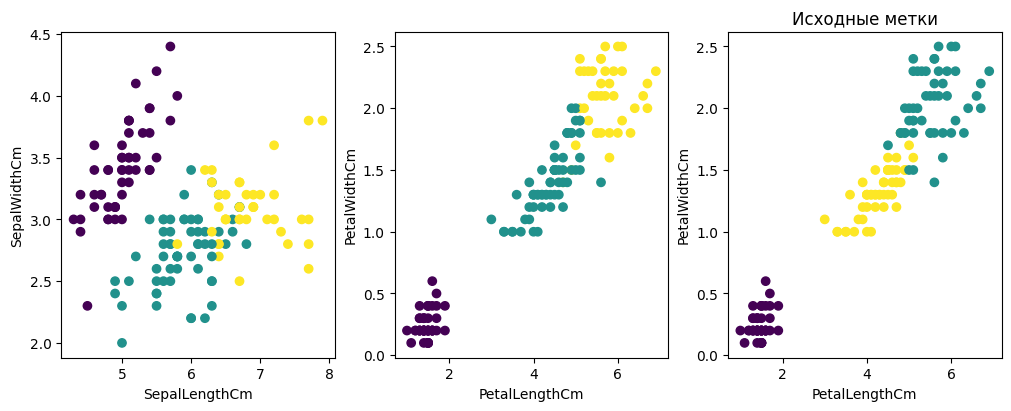

In [12]:
fig, axs = plt.subplots(ncols=3, layout="constrained", figsize = (10, 4))

axs[0].scatter(data.loc[:, ['SepalLengthCm']], data.loc[:, ['SepalWidthCm']], c=k_means_labels)
axs[0].set_xlabel('SepalLengthCm')
axs[0].set_ylabel('SepalWidthCm')

axs[1].scatter(data.loc[:, ['PetalLengthCm']], data.loc[:, ['PetalWidthCm']], c=k_means_labels)
axs[1].set_xlabel('PetalLengthCm')
axs[1].set_ylabel('PetalWidthCm')

axs[2].scatter(data.loc[:, ['PetalLengthCm']], data.loc[:, ['PetalWidthCm']], c=correct_labels)
axs[2].set_title('Исходные метки')
axs[2].set_xlabel('PetalLengthCm')
axs[2].set_ylabel('PetalWidthCm')

plt.show()

In [13]:
k_means_compare_results = compare_clusters_centers(original_clusters_centers, k_means.cluster_centers_)
k_means_compare_results

[{'result_cluster': array([0.19611111, 0.59083333, 0.07864407, 0.06      ]),
  'closest_cluster': array([0.19611111, 0.59083333, 0.07864407, 0.06      ]),
  'difference': 1.783984089923424e-16,
  'accuracy': 0.9999999999999998},
 {'result_cluster': array([0.44125683, 0.30737705, 0.57571548, 0.54918033]),
  'closest_cluster': array([0.45444444, 0.32083333, 0.55254237, 0.51083333]),
  'difference': 0.04860524111966191,
  'accuracy': 0.9513947588803381},
 {'result_cluster': array([0.70726496, 0.4508547 , 0.79704476, 0.82478632]),
  'closest_cluster': array([0.63555556, 0.40583333, 0.77152542, 0.8025    ]),
  'difference': 0.09119801962657352,
  'accuracy': 0.9088019803734265}]

In [14]:
print(f'Точность кластеризации: {get_clustering_accuracy(k_means_compare_results, 3)}')

Точность кластеризации: 0.9533989130845881


### Fuzzy C-means

In [15]:
from fcmeans import FCM

fcm = FCM(n_clusters=3)
fcm.fit(scaled_data)
fcm_labels = fcm.predict(scaled_data)

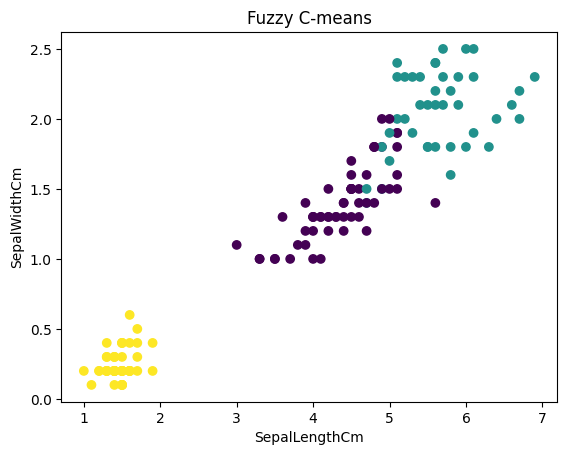

In [16]:
plt.scatter(data.loc[:, ['PetalLengthCm']], data.loc[:, ['PetalWidthCm']], c=fcm_labels)
plt.title('Fuzzy C-means')
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.show()

In [17]:
print('Количество правильно кластеризованных значений: 126')
print(f'Процент правильно кластеризованных значений: {126 / 150}')

Количество правильно кластеризованных значений: 126
Процент правильно кластеризованных значений: 0.84


In [18]:
compare_clusters_centers(original_clusters_centers, fcm.centers)

[{'result_cluster': array([0.4364572 , 0.30840981, 0.56695153, 0.52990798]),
  'closest_cluster': array([0.45444444, 0.32083333, 0.55254237, 0.51083333]),
  'difference': 0.03239368746342117,
  'accuracy': 0.9676063125365788},
 {'result_cluster': array([0.67749665, 0.44133666, 0.77527199, 0.81158073]),
  'closest_cluster': array([0.63555556, 0.40583333, 0.77152542, 0.8025    ]),
  'difference': 0.05582148713203882,
  'accuracy': 0.9441785128679612},
 {'result_cluster': array([0.1953736 , 0.58454675, 0.08294333, 0.06301197]),
  'closest_cluster': array([0.19611111, 0.59083333, 0.07864407, 0.06      ]),
  'difference': 0.008223178181881653,
  'accuracy': 0.9917768218181183}]

In [19]:
fcm.centers

array([[0.4364572 , 0.30840981, 0.56695153, 0.52990798],
       [0.67749665, 0.44133666, 0.77527199, 0.81158073],
       [0.1953736 , 0.58454675, 0.08294333, 0.06301197]])

In [20]:
fcm_centers = get_clusters_centers(scaled_data, fcm_labels, 3)
fcm_centers

[array([0.43438697, 0.3045977 , 0.57159556, 0.54238506]),
 array([0.69775132, 0.44444444, 0.78692494, 0.81448413]),
 array([0.19611111, 0.59083333, 0.07864407, 0.06      ])]

In [21]:
fcm_compare_results = compare_clusters_centers(original_clusters_centers, fcm_centers)
fcm_compare_results

[{'result_cluster': array([0.43438697, 0.3045977 , 0.57159556, 0.54238506]),
  'closest_cluster': array([0.45444444, 0.32083333, 0.55254237, 0.51083333]),
  'difference': 0.044993700348033266,
  'accuracy': 0.9550062996519667},
 {'result_cluster': array([0.69775132, 0.44444444, 0.78692494, 0.81448413]),
  'closest_cluster': array([0.63555556, 0.40583333, 0.77152542, 0.8025    ]),
  'difference': 0.07576209964656867,
  'accuracy': 0.9242379003534313},
 {'result_cluster': array([0.19611111, 0.59083333, 0.07864407, 0.06      ]),
  'closest_cluster': array([0.19611111, 0.59083333, 0.07864407, 0.06      ]),
  'difference': 0.0,
  'accuracy': 1.0}]

In [22]:
print(f'Точность кластеризации: {get_clustering_accuracy(fcm_compare_results, 3)}')

Точность кластеризации: 0.959748066668466


### DBSCAN

In [23]:
from sklearn.cluster import DBSCAN

EPS = 0.25
MIN_SAMPLES = 4
METRIC = 'euclidean'

dbscan = DBSCAN(eps=EPS, min_samples=MIN_SAMPLES, metric=METRIC)
dbscan_labels = dbscan.fit_predict(scaled_data)

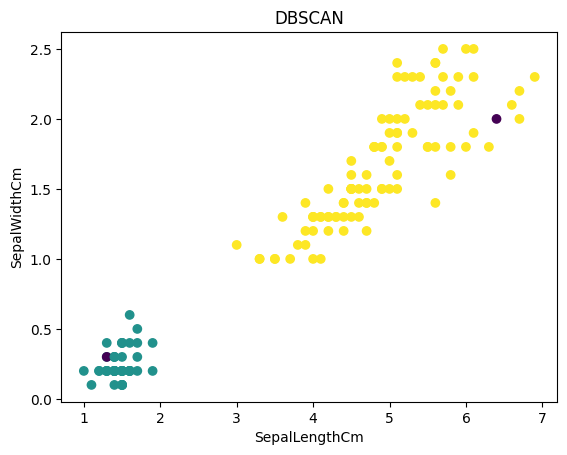

In [24]:
plt.scatter(data.loc[:, ['PetalLengthCm']], data.loc[:, ['PetalWidthCm']], c=dbscan_labels)
plt.title('DBSCAN')
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.show()

In [25]:
print(f'Количество найденных кластеров: {len(set(dbscan_labels)) - 1}')
print(f'Количество некластеризованных значений: {list(dbscan_labels).count(-1)}')
print(f'Процент некластеризованных значений: {list(dbscan_labels).count(-1) / len(list(dbscan_labels))}%')

Количество найденных кластеров: 2
Количество некластеризованных значений: 2
Процент некластеризованных значений: 0.013333333333333334%


In [26]:
dbscan_centers = get_clusters_centers(scaled_data, dbscan_labels, len(set(dbscan_labels)) - 1)
dbscan_centers

[array([0.19897959, 0.60034014, 0.07921135, 0.05952381]),
 array([0.54040404, 0.35942761, 0.65947612, 0.65530303])]

In [27]:
dbscan_compare_results = compare_clusters_centers(original_clusters_centers, dbscan_centers)
dbscan_compare_results

[{'result_cluster': array([0.19897959, 0.60034014, 0.07921135, 0.05952381]),
  'closest_cluster': array([0.19611111, 0.59083333, 0.07864407, 0.06      ]),
  'difference': 0.009957712642767938,
  'accuracy': 0.9900422873572321},
 {'result_cluster': array([0.54040404, 0.35942761, 0.65947612, 0.65530303]),
  'closest_cluster': array([0.45444444, 0.32083333, 0.55254237, 0.51083333]),
  'difference': 0.20294060530264682,
  'accuracy': 0.7970593946973532}]

In [28]:
print(f'Точность кластеризации: {get_clustering_accuracy(dbscan_compare_results, 3)}')

Точность кластеризации: 0.5957005606848618


### GMM

In [29]:
from sklearn.mixture import GaussianMixture

COMP = 3

gmm = GaussianMixture(n_components=COMP)
gmm.fit(scaled_data)
gmm_labels = gmm.predict(scaled_data)

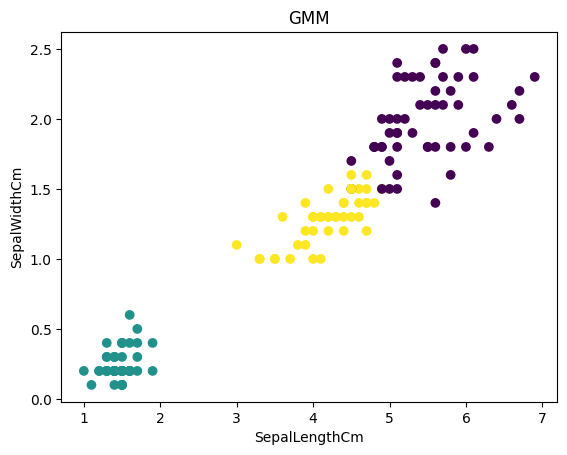

In [30]:
plt.scatter(data.loc[:, ['PetalLengthCm']], data.loc[:, ['PetalWidthCm']], c=gmm_labels)
plt.title('GMM')
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.show()

In [31]:
gmm_centers = get_clusters_centers(scaled_data, gmm_labels, 3)
gmm_centers

[array([0.62626263, 0.39621212, 0.76086287, 0.78712121]),
 array([0.19611111, 0.59083333, 0.07864407, 0.06      ]),
 array([0.44567901, 0.32314815, 0.54124294, 0.49722222])]

In [32]:
gmm_compare_results = compare_clusters_centers(original_clusters_centers, gmm_centers)
gmm_compare_results

[{'result_cluster': array([0.62626263, 0.39621212, 0.76086287, 0.78712121]),
  'closest_cluster': array([0.63555556, 0.40583333, 0.77152542, 0.8025    ]),
  'difference': 0.023002684899440753,
  'accuracy': 0.9769973151005592},
 {'result_cluster': array([0.19611111, 0.59083333, 0.07864407, 0.06      ]),
  'closest_cluster': array([0.19611111, 0.59083333, 0.07864407, 0.06      ]),
  'difference': 0.0,
  'accuracy': 1.0},
 {'result_cluster': array([0.44567901, 0.32314815, 0.54124294, 0.49722222]),
  'closest_cluster': array([0.45444444, 0.32083333, 0.55254237, 0.51083333]),
  'difference': 0.01987789589321708,
  'accuracy': 0.9801221041067829}]

In [33]:
print(f'Точность кластеризации: {get_clustering_accuracy(gmm_compare_results, 3)}')

Точность кластеризации: 0.9857064730691141


### Kohonen self-organizing maps

In [34]:
from sklearn_som.som import SOM

som = SOM(m=3, n=1, dim=4)
som.fit(scaled_data)
som_labels = som.predict(scaled_data)

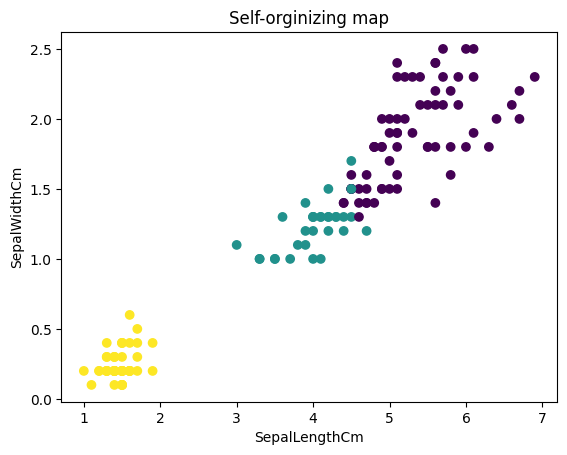

In [35]:
plt.scatter(data.loc[:, ['PetalLengthCm']], data.loc[:, ['PetalWidthCm']], c=som_labels)
plt.title('Self-orginizing map')
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.show()

In [36]:
compare_clusters_centers(original_clusters_centers, som.cluster_centers_)

[{'result_cluster': array([[0.57947416, 0.40574586, 0.67280092, 0.69122032]]),
  'closest_cluster': array([0.63555556, 0.40583333, 0.77152542, 0.8025    ]),
  'difference': 0.15898057725278675,
  'accuracy': 0.8410194227472132},
 {'result_cluster': array([[0.41300706, 0.38562674, 0.47701467, 0.46049223]]),
  'closest_cluster': array([0.45444444, 0.32083333, 0.55254237, 0.51083333]),
  'difference': 0.11897017137728305,
  'accuracy': 0.881029828622717},
 {'result_cluster': array([[0.25914387, 0.5254951 , 0.19214326, 0.17500556]]),
  'closest_cluster': array([0.19611111, 0.59083333, 0.07864407, 0.06      ]),
  'difference': 0.18533903936632426,
  'accuracy': 0.8146609606336758}]

In [37]:
som.cluster_centers_

array([[[0.57947416, 0.40574586, 0.67280092, 0.69122032]],

       [[0.41300706, 0.38562674, 0.47701467, 0.46049223]],

       [[0.25914387, 0.5254951 , 0.19214326, 0.17500556]]])

In [38]:
som_centers = get_clusters_centers(scaled_data, som_labels, 3)
som_centers

[array([0.62867647, 0.40747549, 0.7328016 , 0.7432598 ]),
 array([0.3671875 , 0.26953125, 0.51165254, 0.47265625]),
 array([0.19611111, 0.59083333, 0.07864407, 0.06      ])]

In [39]:
som_compare_results = compare_clusters_centers(original_clusters_centers, som_centers)
som_compare_results

[{'result_cluster': array([0.62867647, 0.40747549, 0.7328016 , 0.7432598 ]),
  'closest_cluster': array([0.63555556, 0.40583333, 0.77152542, 0.8025    ]),
  'difference': 0.07112632575479692,
  'accuracy': 0.9288736742452031},
 {'result_cluster': array([0.3671875 , 0.26953125, 0.51165254, 0.47265625]),
  'closest_cluster': array([0.45444444, 0.32083333, 0.55254237, 0.51083333]),
  'difference': 0.11565096644201978,
  'accuracy': 0.8843490335579802},
 {'result_cluster': array([0.19611111, 0.59083333, 0.07864407, 0.06      ]),
  'closest_cluster': array([0.19611111, 0.59083333, 0.07864407, 0.06      ]),
  'difference': 0.0,
  'accuracy': 1.0}]

In [40]:
print(f'Точность кластеризации: {get_clustering_accuracy(som_compare_results, 3)}')

Точность кластеризации: 0.9377409026010611


### t-SNE

In [41]:
from sklearn.manifold import TSNE

perplexity = 50
tsne = TSNE(n_components=2, perplexity=perplexity)
tsne_data = tsne.fit_transform(scaled_data)

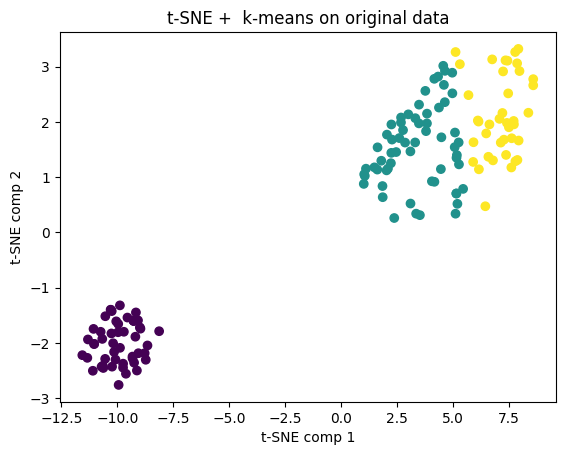

In [42]:
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=k_means_labels)
plt.title('t-SNE + k-means on original data')
plt.xlabel('t-SNE comp 1')
plt.ylabel('t-SNE comp 2')
plt.show()

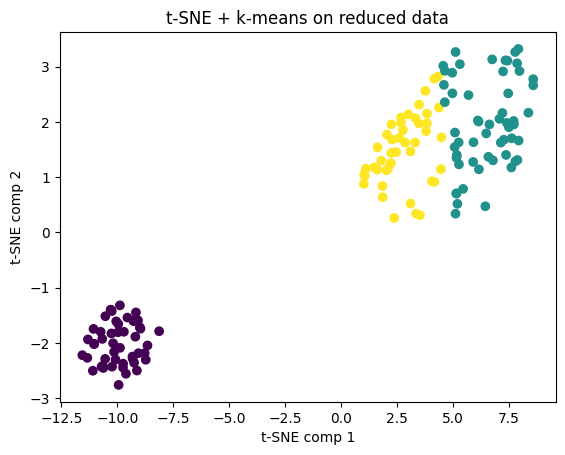

In [49]:
k_means_t_sne = KMeans(init="k-means++", n_init=15, n_clusters=3)
k_means_t_sne.fit(tsne_data)
k_means_t_sne_labels = k_means_t_sne.predict(tsne_data)

plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=k_means_t_sne_labels)
plt.title('t-SNE + k-means on reduced data')
plt.xlabel('t-SNE comp 1')
plt.ylabel('t-SNE comp 2')
plt.show()

In [50]:
tsne_clusters_centers = [
    get_center(tsne_data[0:50]),
    get_center(tsne_data[50:100]),
    get_center(tsne_data[100:])
]
k_means_tsne_compare_results = compare_clusters_centers(tsne_clusters_centers, k_means_t_sne.cluster_centers_)
k_means_tsne_compare_results

[{'result_cluster': array([-9.926903 , -1.9887409], dtype=float32),
  'closest_cluster': array([-9.926902 , -1.9887406], dtype=float32),
  'difference': 1.0185246e-06,
  'accuracy': 0.9999989814754144},
 {'result_cluster': array([6.4913764, 1.982909 ], dtype=float32),
  'closest_cluster': array([6.569256 , 1.7456316], dtype=float32),
  'difference': 0.24973138,
  'accuracy': 0.7502686232328415},
 {'result_cluster': array([2.7978542, 1.4986973], dtype=float32),
  'closest_cluster': array([3.163195 , 1.7940803], dtype=float32),
  'difference': 0.46981373,
  'accuracy': 0.530186265707016}]

In [51]:
print(f'Точность кластеризации: {get_clustering_accuracy(k_means_tsne_compare_results, 3)}')

Точность кластеризации: 0.760151290138424


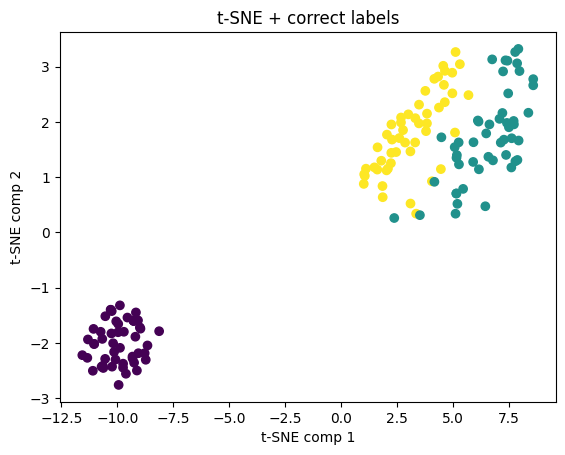

In [52]:
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=correct_labels)
plt.title('t-SNE + correct labels')
plt.xlabel('t-SNE comp 1')
plt.ylabel('t-SNE comp 2')
plt.show()

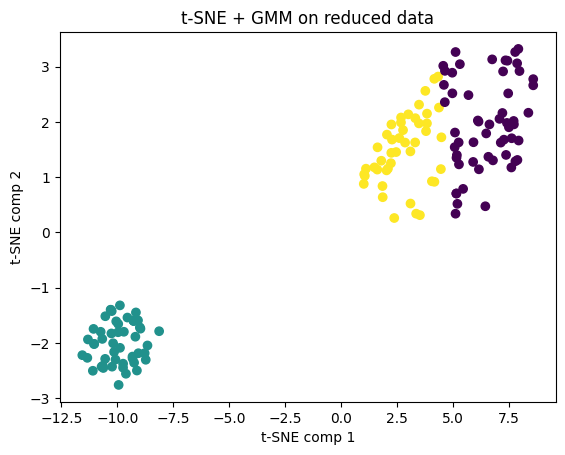

In [54]:
gmm_tsne = GaussianMixture(n_components=3)
gmm_tsne.fit(tsne_data)
gmm_tsne_labels = gmm_tsne.predict(tsne_data)

plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=t_sne_labels)
plt.title('t-SNE + GMM on reduced data')
plt.xlabel('t-SNE comp 1')
plt.ylabel('t-SNE comp 2')
plt.show()

In [55]:
gmm_tsne_centers = get_clusters_centers(tsne_data, gmm_tsne_labels, 3)
gmm_tsne_compare_results = compare_clusters_centers(tsne_clusters_centers, gmm_tsne_centers)
gmm_tsne_compare_results

[{'result_cluster': array([-9.926902 , -1.9887406], dtype=float32),
  'closest_cluster': array([-9.926902 , -1.9887406], dtype=float32),
  'difference': 0.0,
  'accuracy': 1.0},
 {'result_cluster': array([6.325644 , 1.6876878], dtype=float32),
  'closest_cluster': array([6.569256 , 1.7456316], dtype=float32),
  'difference': 0.25040808,
  'accuracy': 0.7495919167995453},
 {'result_cluster': array([3.0087843, 1.8744335], dtype=float32),
  'closest_cluster': array([3.163195 , 1.7940803], dtype=float32),
  'difference': 0.17406689,
  'accuracy': 0.825933113694191}]

In [56]:
print(f'Точность кластеризации: {get_clustering_accuracy(gmm_tsne_compare_results, 3)}')

Точность кластеризации: 0.858508343497912
